# Project 12: Explanatory Data Analysis Challenge (Olympic Games)

This project is probably the most comprehensive project covering data, impart
Some cleaning, several data matches and also statistics.
In this project we will focus on explanatory data analysis and advanced data legislation with the Seaborn.
So we're going to analyze the Olympic medals dataset containing all medals that have been awarded in the Summer and Winter Olympic Games, and we try to find an answer for some following questions.

## Data Import and Inspection

Import the Datasets Summer (__summer.csv__), Winter (__winter.csv__) and dictionary (__dictionary.csv__) and Inspect! 

In [142]:
import pandas as pd

In [143]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [144]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [145]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [146]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [147]:
winter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5770 entries, 0 to 5769
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5770 non-null   int64 
 1   City        5770 non-null   object
 2   Sport       5770 non-null   object
 3   Discipline  5770 non-null   object
 4   Athlete     5770 non-null   object
 5   Country     5770 non-null   object
 6   Gender      5770 non-null   object
 7   Event       5770 non-null   object
 8   Medal       5770 non-null   object
dtypes: int64(1), object(8)
memory usage: 405.8+ KB


In [148]:
dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         201 non-null    object 
 1   Code            201 non-null    object 
 2   Population      196 non-null    float64
 3   GDP per Capita  176 non-null    float64
dtypes: float64(2), object(2)
memory usage: 6.4+ KB


## Merging and Concatenating

1. __Merge__ Summer and Winter (one row for each Medal awarded in any Olympic Games) and save the merged DataFrame in __olympics__. 
2. An __additional column__ (e.g. "Edition") shall indicate the Edition -> __Summer or Winter__.
3. Add the __full Country name__ from dictionary to olympics (e.g. France for FRA).

In [149]:
olympics = pd.concat([summer, winter], axis = 0, keys = ["Summer", "Winter"], names = ["Edition"]).reset_index().drop(columns ="level_1")

In [150]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [151]:
olympics = olympics.merge(dic.iloc[:, :2], how = "left", left_on= "Country", right_on = "Code").drop(columns=["Code"])

In [152]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [153]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36935 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36935 non-null  object
 1   Year        36935 non-null  int64 
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Country_x   36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
 10  Country_y   30568 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.1+ MB


In [154]:
olympics.reset_index(drop= True, inplace=True)

In [155]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country_x,Gender,Event,Medal,Country_y
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


## Data Cleaning (Part 1)

1. If you haven´t done it yet: Assign appropriate __Column Headers__ to Country Codes (e.g. __"Code"__) and full Country Names (e.g. __"Country"__).

In [156]:
olympics.rename(columns= {"Country_x":"Code", "Country_y": "Country"}, inplace = True)

2. __Remove Spaces__ from column headers in olympics and dictionary.

In [157]:
dic.rename(columns={"GDP per Capita" : "GDP"}, inplace=True)

3. For some Country Codes, there is no corresponding __full Country Name__ available (e.g. for "URS") -> __missing values__ in olympics. Identify these Country Codes and search the Web for the full Country Names. __Replace__ missing values!

In [158]:
olympics[olympics["Country"].isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,NaN
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,NaN
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,NaN
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,NaN
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,NaN
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,NaN
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,NaN
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,NaN


In [159]:
missing = olympics[olympics.Country.isna()].index
missing

Index([  132,   133,   134,   135,   136,   137,   257,   258,   259,   260,
       ...
       33939, 33947, 33949, 33953, 33954, 33961, 33977, 33978, 33979, 33980],
      dtype='int64', length=6367)

In [160]:
olympics[olympics.Country.isna()].Code.value_counts().index

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

In [161]:
old_c = olympics[olympics.Country.isnull()].Code.value_counts().index
old_c

Index(['URS', 'GDR', 'ROU', 'FRG', 'TCH', 'YUG', 'EUN', 'EUA', 'ZZX', 'SRB',
       'ANZ', 'RU1', 'MNE', 'TTO', 'BOH', 'BWI', 'SGP', 'IOP'],
      dtype='object', name='Code')

In [162]:
mapper = pd.Series(index=old_c, name="Country", data = ["Soviet Union", "East Germany", "Romania", "West Germany", "Czechoslovakia",
                               "Yugoslavia", "Unified Team", "Unified Team of Germany", "Mixed teams", "Serbia",
                              "Australasia", "Russian Empire", "Montenegro", "Trinidad and Tobago", "Bohemia", 
                              "West Indies Federation", "Singapore", "Independent Olympic Participants"])

In [163]:
mapper

Code
URS                        Soviet Union
GDR                        East Germany
ROU                             Romania
FRG                        West Germany
TCH                      Czechoslovakia
YUG                          Yugoslavia
EUN                        Unified Team
EUA             Unified Team of Germany
ZZX                         Mixed teams
SRB                              Serbia
ANZ                         Australasia
RU1                      Russian Empire
MNE                          Montenegro
TTO                 Trinidad and Tobago
BOH                             Bohemia
BWI              West Indies Federation
SGP                           Singapore
IOP    Independent Olympic Participants
Name: Country, dtype: object

In [164]:
olympics.loc[missing, "Code"].map(mapper)

132         Mixed teams
133         Mixed teams
134         Mixed teams
135         Mixed teams
136         Mixed teams
              ...      
33961      Unified Team
33977    Czechoslovakia
33978    Czechoslovakia
33979    Czechoslovakia
33980    Czechoslovakia
Name: Code, Length: 6367, dtype: object

In [165]:
olympics.Country.fillna(olympics.Code.map(mapper), inplace=True)

In [166]:
olympics.loc[missing]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
132,Summer,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,Mixed teams
133,Summer,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,Mixed teams
134,Summer,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,Mixed teams
135,Summer,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,Mixed teams
136,Summer,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,Mixed teams
...,...,...,...,...,...,...,...,...,...,...,...
33961,Winter,1992,Albertville,Skiing,Freestyle Skiing,"KOZHEVNIKOVA, Yelizaveta",EUN,Women,Moguls,Silver,Unified Team
33977,Winter,1992,Albertville,Skiing,Ski Jumping,"GODER, Tomas",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33978,Winter,1992,Albertville,Skiing,Ski Jumping,"JEZ, Frantisek",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia
33979,Winter,1992,Albertville,Skiing,Ski Jumping,"PARMA, Jiri",TCH,Men,K120 Team (90M),Bronze,Czechoslovakia


## Data Cleaning (Part 2)

1. __Remove rows__ from olympics where the Country code is unknown. (Make sure you reset the Index -> RangeIndex)

In [167]:
olympics[olympics.Code.isna()]

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold,NaN
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold,NaN
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver,NaN
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver,NaN


In [168]:
olympics.dropna(subset=["Code"], inplace= True)

In [169]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36931 entries, 0 to 36934
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Edition     36931 non-null  object
 1   Year        36931 non-null  int64 
 2   City        36931 non-null  object
 3   Sport       36931 non-null  object
 4   Discipline  36931 non-null  object
 5   Athlete     36931 non-null  object
 6   Code        36931 non-null  object
 7   Gender      36931 non-null  object
 8   Event       36931 non-null  object
 9   Medal       36931 non-null  object
 10  Country     36931 non-null  object
dtypes: int64(1), object(10)
memory usage: 3.4+ MB


In [170]:
olympics.reset_index(drop = True, inplace = True)

2. Convert the column __Medal__ into an __ordered Categorical__ column ("Bronze" < "Silver" < "Gold")

In [171]:
olympics["Medal"].value_counts()

Medal
Gold      12405
Bronze    12288
Silver    12238
Name: count, dtype: int64

In [172]:
olympics["Medal"] = olympics["Medal"].astype("category")

In [173]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Edition     36931 non-null  object  
 1   Year        36931 non-null  int64   
 2   City        36931 non-null  object  
 3   Sport       36931 non-null  object  
 4   Discipline  36931 non-null  object  
 5   Athlete     36931 non-null  object  
 6   Code        36931 non-null  object  
 7   Gender      36931 non-null  object  
 8   Event       36931 non-null  object  
 9   Medal       36931 non-null  category
 10  Country     36931 non-null  object  
dtypes: category(1), int64(1), object(9)
memory usage: 2.9+ MB


In [174]:
olympics.Medal.sort_values()

36930    Bronze
25565    Bronze
25562    Bronze
25559    Bronze
11084    Bronze
          ...  
10811    Silver
10810    Silver
10809    Silver
25834    Silver
18465    Silver
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze', 'Gold', 'Silver']

In [175]:
olympics["Medal"] = olympics["Medal"].cat.set_categories(["Bronze", "Silver","Gold"], ordered = True)

In [176]:
olympics.Medal.sort_values()

36930    Bronze
8916     Bronze
15339    Bronze
27698    Bronze
8919     Bronze
          ...  
25833      Gold
10807      Gold
10806      Gold
10804      Gold
0          Gold
Name: Medal, Length: 36931, dtype: category
Categories (3, object): ['Bronze' < 'Silver' < 'Gold']

## What are the most successful countries of all times?

1. What are the __Top 10__ Countries by __total medals__?

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [178]:
top10 = olympics.Country.value_counts().head(10)
top10

Country
United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: count, dtype: int64

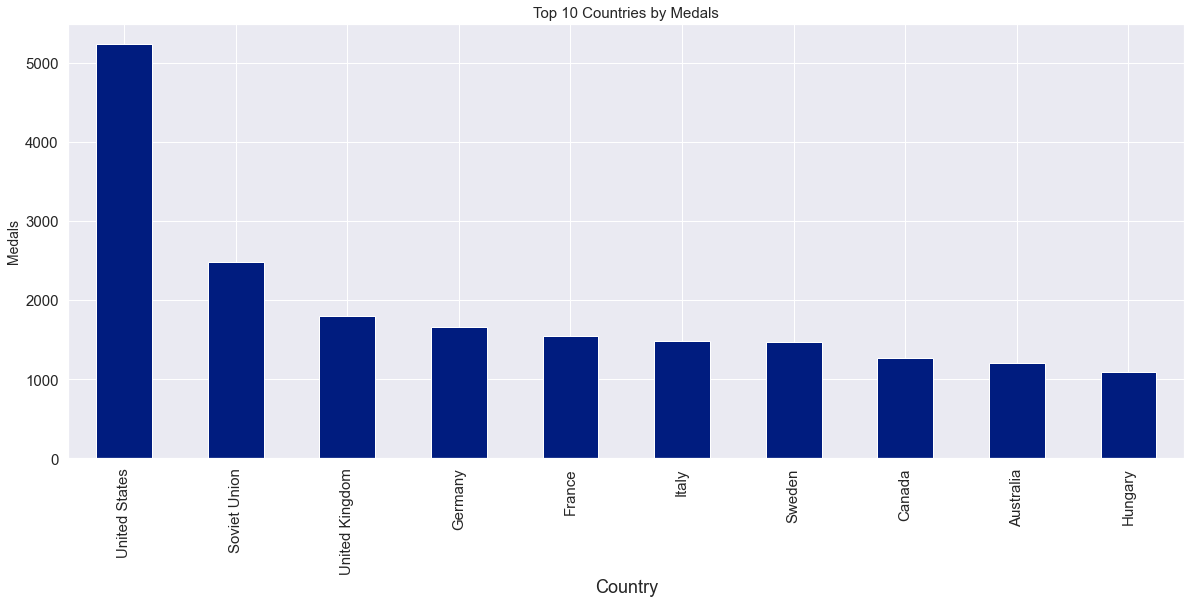

In [179]:
top10.plot(kind = "bar", fontsize = 15, figsize =(20,8))
plt.title("Top 10 Countries by Medals", fontsize = 15)
plt.ylabel("Medals", fontsize = 14)
plt.show()

2. __Split__ the total medals of Top 10 Countries into __Summer / Winter__. Are there typical Summer/Winter Games Countries? 

In [180]:
top_olympics = olympics[olympics.Country.isin(top10.index)]
top_olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


In [181]:
Summer = top_olympics[top_olympics["Edition"] == "Summer"]
summer

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [182]:
Winter = top_olympics[top_olympics["Edition"] == "Winter"]
Winter

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
31161,Winter,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France
31162,Winter,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France
31163,Winter,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France
31164,Winter,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France
31182,Winter,1924,Chamonix,Bobsleigh,Bobsleigh,"ARNOLD, Thomas",GBR,Men,Four-Man,Silver,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
36924,Winter,2014,Sochi,Skiing,Snowboard,"KOBER, Amelie",GER,Women,Parallel Slalom,Bronze,Germany
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada


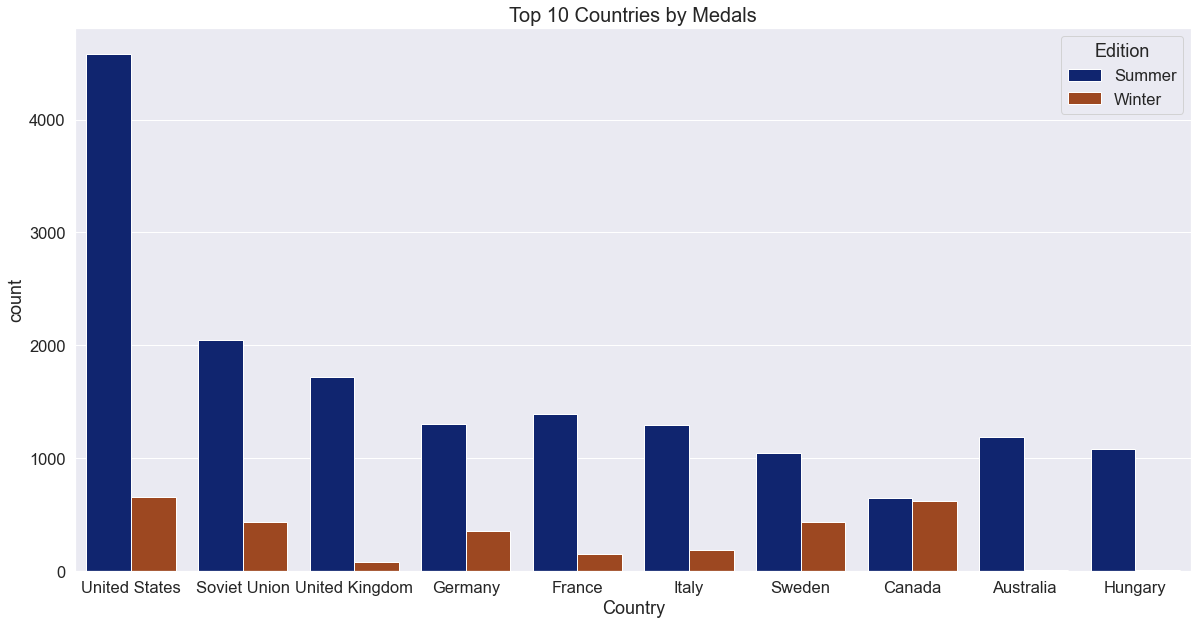

In [183]:
plt.figure(figsize = (20,10))
sns.set(font_scale=1.5, palette = "dark")
sns.countplot(data = top_olympics, x = "Country", hue ="Edition", order = top10.index)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

3. __Split__ the total medals of Top 10 Countries into __Gold, Silver, Bronze__. 

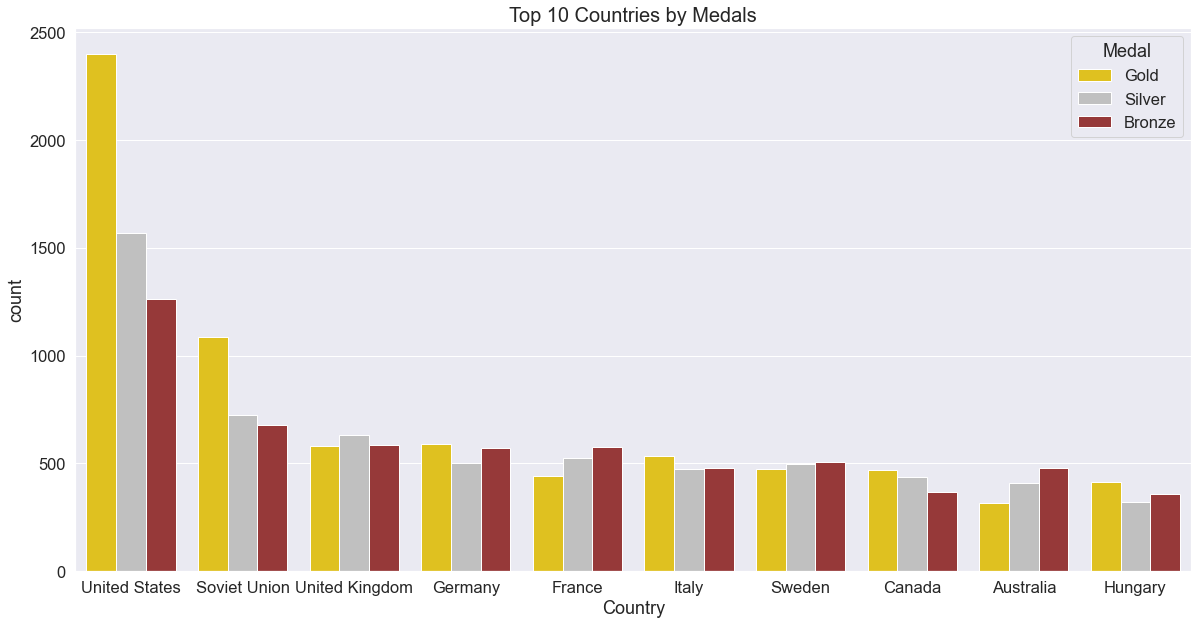

In [184]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 1.5, palette = "dark")
sns.countplot(data = top_olympics, x="Country", hue = "Medal", hue_order=["Gold", "Silver", "Bronze"], palette = ["gold", "Silver", "brown"] ,order= top10.index,)
plt.title("Top 10 Countries by Medals", fontsize = 20)
plt.show()

## Do GDP, Population and Politics matter?

1. Create the following __aggregated and merged__ DataFrame with __Top 50 Countries__ (you can see an excerpt with the first 12 Countries). The Column __Total_Games__ shows the __number of Participations__ (as an approximation: determine the number of Editions where Countries have won at least one medal).

In [185]:
top_olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
6,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary
11,Summer,1896,Athens,Athletics,Athletics,"LANE, Francis",USA,Men,100M,Bronze,United States
12,Summer,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary
13,Summer,1896,Athens,Athletics,Athletics,"BURKE, Thomas",USA,Men,100M,Gold,United States


In [186]:
medals_per_country = pd.crosstab(index = olympics.Country,
                                 columns = olympics.Medal,
                                 margins = True,
                                 margins_name = "Total")
medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442
Zambia,1,1,0,2


In [187]:
medals_per_country.drop("Total", axis = 0, inplace = True)

In [188]:
medals_per_country

Medal,Bronze,Silver,Gold,Total
Country,,,,
Afghanistan,2,0,0,2
Algeria,8,2,5,15
Argentina,91,99,69,259
Armenia,8,2,1,11
Australasia,5,4,20,29
...,...,...,...,...
West Germany,227,191,166,584
West Indies Federation,5,0,0,5
Yugoslavia,119,180,143,442


In [189]:
medals_per_country = medals_per_country[["Total", "Gold", "Silver", "Bronze"]].sort_values(by =["Total", "Gold", "Silver", "Bronze"], ascending= False)

In [190]:
medals_per_country.head(50)

Medal,Total,Gold,Silver,Bronze
Country,,,,
United States,5238,2402,1571,1265
Soviet Union,2489,1088,724,677
United Kingdom,1799,580,632,587
Germany,1665,589,504,572
France,1548,444,526,578
Italy,1488,534,473,481
Sweden,1477,476,496,505
Canada,1274,470,435,369
Australia,1204,317,408,479


In [191]:
dic.head()

,Country,Code,Population,GDP
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [192]:
medals_per_country = medals_per_country.merge(dic, how = "left", left_index = True, 
                                              right_on = "Country").drop(columns = ["Code"]).set_index("Country")

In [193]:
medals_per_country

,Total,Gold,Silver,Bronze,Population,GDP
Country,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426
Soviet Union,2489,1088,724,677,NaN,NaN
United Kingdom,1799,580,632,587,65138232.0,43875.969614
Germany,1665,589,504,572,81413145.0,41313.313995
France,1548,444,526,578,66808385.0,36205.568102
...,...,...,...,...,...,...
Iraq,1,0,0,1,36423395.0,4943.760388
Macedonia,1,0,0,1,2078453.0,4852.657848
Mauritius,1,0,0,1,1262605.0,9252.110724


In [194]:
olympics.nunique()

Edition           2
Year             33
City             41
Sport            48
Discipline       80
Athlete       26494
Code            148
Gender            2
Event           733
Medal             3
Country         145
dtype: int64

In [195]:
olympics["Games"] = olympics.apply(lambda x: str(x.Year)+" "+x.City, axis = 1)
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [196]:
olympics.Games.value_counts()

Games
2008 Beijing                   2042
2000 Sydney                    2015
2004 Athens                    1998
2012 London                    1945
1996 Atlanta                   1859
1992 Barcelona                 1705
1988 Seoul                     1546
1984 Los Angeles               1459
1980 Moscow                    1387
1976 Montreal                  1305
1920 Antwerp                   1298
1972 Munich                    1185
1968 Mexico                    1031
1964 Tokyo                     1010
1952 Helsinki                   889
1956 Melbourne / Stockholm      885
1912 Stockholm                  885
1924 Paris                      884
1960 Rome                       882
1936 Berlin                     875
1948 London                     814
1908 London                     804
1928 Amsterdam                  710
1932 Los Angeles                615
2014 Sochi                      612
2006 Turin                      531
2010 Vancouver                  529
1900 Paris            

In [197]:
olympics.groupby("Country").apply(lambda x: x.Games.nunique())

Country
Afghanistan                2
Algeria                    6
Argentina                 18
Armenia                    4
Australasia                2
                          ..
West Germany              12
West Indies Federation     1
Yugoslavia                18
Zambia                     2
Zimbabwe                   3
Length: 145, dtype: int64

In [198]:
medals_per_country["Total_Games"] = olympics.groupby("Country").apply(lambda x: x.Games.nunique())

In [199]:
medals_per_country.head(50)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,3.214188e+08,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,6.513823e+07,43875.969614,42
Germany,1665,589,504,572,8.141314e+07,41313.313995,25
France,1548,444,526,578,6.680838e+07,36205.568102,47
Italy,1488,534,473,481,6.080208e+07,29957.804315,43
Sweden,1477,476,496,505,9.798871e+06,50579.673649,47
Canada,1274,470,435,369,3.585177e+07,43248.529909,47
Australia,1204,317,408,479,2.378117e+07,56310.962993,30


2. __Convert__ the __absolute values__ in the DataFrame into __ranks__ and save the ranks DataFrame in new variable (see screenshot). Ranks are more meaningful than absolute numbers.

In [200]:
medals_per_country.rank(ascending = False).head(50)

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,7.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,3.0,4.0,3.0,3.0,20.0,13.0,10.0
Germany,4.0,3.0,5.0,5.0,15.0,18.0,19.0
France,5.0,8.0,4.0,4.0,19.0,22.0,3.0
Italy,6.0,5.0,7.0,7.0,21.0,25.0,9.0
Sweden,7.0,6.0,6.0,6.0,71.0,10.0,3.0
Canada,8.0,7.0,8.0,12.0,35.0,15.0,3.0
Australia,9.0,13.0,9.0,8.0,46.0,6.0,14.0


## Statistical Analysis and Hypothesis Testing with scipy

In the follwing work with __Ranks__!
Check whether __GDP__ (Standard of Living), __Total_Games__ (Political Stability measure) and __Population__ (Size) have an effect on __Total Medals__. (hint: work with spearman correlation, not with pearson correlation)

In [201]:
medals_per_country.head()

,Total,Gold,Silver,Bronze,Population,GDP,Total_Games
Country,,,,,,,
United States,5238,2402,1571,1265,321418820.0,56115.718426,48
Soviet Union,2489,1088,724,677,NaN,NaN,18
United Kingdom,1799,580,632,587,65138232.0,43875.969614,42
Germany,1665,589,504,572,81413145.0,41313.313995,25
France,1548,444,526,578,66808385.0,36205.568102,47


In [202]:
medals_per_country.drop(columns=["Gold", "Silver", "Bronze"], inplace = True)

In [203]:
medals_per_country.corr(method="pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.206606,0.437131,0.712917
Population,0.206606,1.000000,-0.089976,0.123700
GDP,0.437131,-0.089976,1.000000,0.563540
Total_Games,0.712917,0.123700,0.563540,1.000000


In [204]:
medals_per_country.corr(method="spearman")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419755,0.458478,0.927611
Population,0.419755,1.000000,-0.239097,0.402098
GDP,0.458478,-0.239097,1.000000,0.498056
Total_Games,0.927611,0.402098,0.498056,1.000000


In [205]:
medals_per_country.rank(ascending=False).corr(method="pearson")

,Total,Population,GDP,Total_Games
Total,1.000000,0.419634,0.458508,0.927611
Population,0.419634,1.000000,-0.239567,0.401448
GDP,0.458508,-0.239567,1.000000,0.497109
Total_Games,0.927611,0.401448,0.497109,1.000000


In [206]:
import scipy.stats as stats

__Hypothesis 1: There is no relationship between Total Medals and Population__

In [207]:
stats.spearmanr(medals_per_country.Total, medals_per_country.Population, nan_policy="omit")

SpearmanrResult(correlation=0.41975527887063924, pvalue=8.132240868116897e-07)

In [208]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.Population, nan_policy="omit")

In [209]:
r

0.41975527887063924

In [210]:
round(p_value)

0

__Reject Hypothesis 1 -> There is a significant (positive) relationship between Total Medals and Population__

----------------------------------------------------

__Hypothesis 2: There is no relationship between Total Medals and GDP per Capita__

In [211]:
stats.spearmanr(medals_per_country.Total, medals_per_country.GDP, nan_policy="omit")

SpearmanrResult(correlation=0.45847787983426685, pvalue=1.5758169913239602e-07)

In [212]:
r, p_value = stats.spearmanr(medals_per_country.Total, medals_per_country.GDP, nan_policy="omit")

In [213]:
r

0.45847787983426685

In [214]:
round(p_value)

0

__Reject Hypothesis 2 -> There is a significant (positive) relationship between Total Medals and GDP per Capita__

-----------------------------------------------------

__Hypothesis 3: There is no relationship between Total Medals and Participations__

In [215]:
medals_per_country.head(50)

,Total,Population,GDP,Total_Games
Country,,,,
United States,5238,3.214188e+08,56115.718426,48
Soviet Union,2489,NaN,NaN,18
United Kingdom,1799,6.513823e+07,43875.969614,42
Germany,1665,8.141314e+07,41313.313995,25
France,1548,6.680838e+07,36205.568102,47
Italy,1488,6.080208e+07,29957.804315,43
Sweden,1477,9.798871e+06,50579.673649,47
Canada,1274,3.585177e+07,43248.529909,47
Australia,1204,2.378117e+07,56310.962993,30


In [216]:
stats.spearmanr(medals_per_country.head(50).Total, medals_per_country.head(50).Total_Games, nan_policy="omit")

SpearmanrResult(correlation=0.6818689415046658, pvalue=4.982151209468708e-08)

In [217]:
r, p_value = stats.spearmanr(medals_per_country.head(50).Total, medals_per_country.head(50).Total_Games, nan_policy="omit")

In [218]:
r

0.6818689415046658

In [219]:
round(p_value)

0

In [220]:
0 >0.05

False

__Reject Hypothesis 3 -> There is a significant (positive) relationship between Total Medals and Participations__

## Aggregating and Ranking

In [221]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Games
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,1896 Athens
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria,1896 Athens
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece,1896 Athens
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece,1896 Athens
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece,1896 Athens
...,...,...,...,...,...,...,...,...,...,...,...,...
36926,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,United Kingdom,2014 Sochi
36927,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,United States,2014 Sochi
36928,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,Canada,2014 Sochi
36929,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,Czech Republic,2014 Sochi


In [222]:
sum_vs_win = pd.crosstab(olympics.Country, olympics.Edition)
sum_vs_win

Edition,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australasia,29,0
...,...,...
West Germany,490,94
West Indies Federation,5,0
Yugoslavia,435,7


In [223]:
men_vs_women = pd.crosstab(olympics.Country, olympics.Gender)
men_vs_women

Gender,Men,Women
Country,,
Afghanistan,2,0
Algeria,12,3
Argentina,187,72
Armenia,11,0
Australasia,27,2
...,...,...
West Germany,450,134
West Indies Federation,5,0
Yugoslavia,379,63


In [224]:
medals_by_cats = pd.concat([sum_vs_win, men_vs_women], axis = 1)
medals_by_cats 

,Summer,Winter,Men,Women
Country,,,,
Afghanistan,2,0,2,0
Algeria,15,0,12,3
Argentina,259,0,187,72
Armenia,11,0,11,0
Australasia,29,0,27,2
...,...,...,...,...
West Germany,490,94,450,134
West Indies Federation,5,0,5,0
Yugoslavia,435,7,379,63


In [225]:
medals_by_cats["Total"] = medals_by_cats.Summer + medals_by_cats.Winter

In [226]:
medals_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
Afghanistan,2,0,2,0,2
Algeria,15,0,12,3,15
Argentina,259,0,187,72,259
Armenia,11,0,11,0,11
Australasia,29,0,27,2,29
...,...,...,...,...,...
West Germany,490,94,450,134,584
West Indies Federation,5,0,5,0,5
Yugoslavia,435,7,379,63,442


In [227]:
medals_by_cats.sort_values("Total", ascending=False, inplace= True)
medals_by_cats

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,4585,653,3618,1620,5238
Soviet Union,2049,440,1807,682,2489
United Kingdom,1720,79,1470,329,1799
Germany,1305,360,1119,546,1665
France,1396,152,1351,197,1548
...,...,...,...,...,...
Iraq,1,0,1,0,1
Senegal,1,0,1,0,1
Macedonia,1,0,1,0,1


In [228]:
ranks = medals_by_cats.rank(ascending=True, method="average")
ranks

,Summer,Winter,Men,Women,Total
Country,,,,,
United States,145.0,145.0,145.0,145.0,145.0
Soviet Union,144.0,142.0,144.0,144.0,144.0
United Kingdom,143.0,127.0,143.0,135.0,143.0
Germany,141.0,139.0,139.0,142.0,142.0
France,142.0,132.0,142.0,129.5,141.0
...,...,...,...,...,...
Iraq,13.5,50.5,19.0,26.0,12.5
Senegal,13.5,50.5,19.0,26.0,12.5
Macedonia,13.5,50.5,19.0,26.0,12.5


In [229]:
top_50 = ranks.head(50)

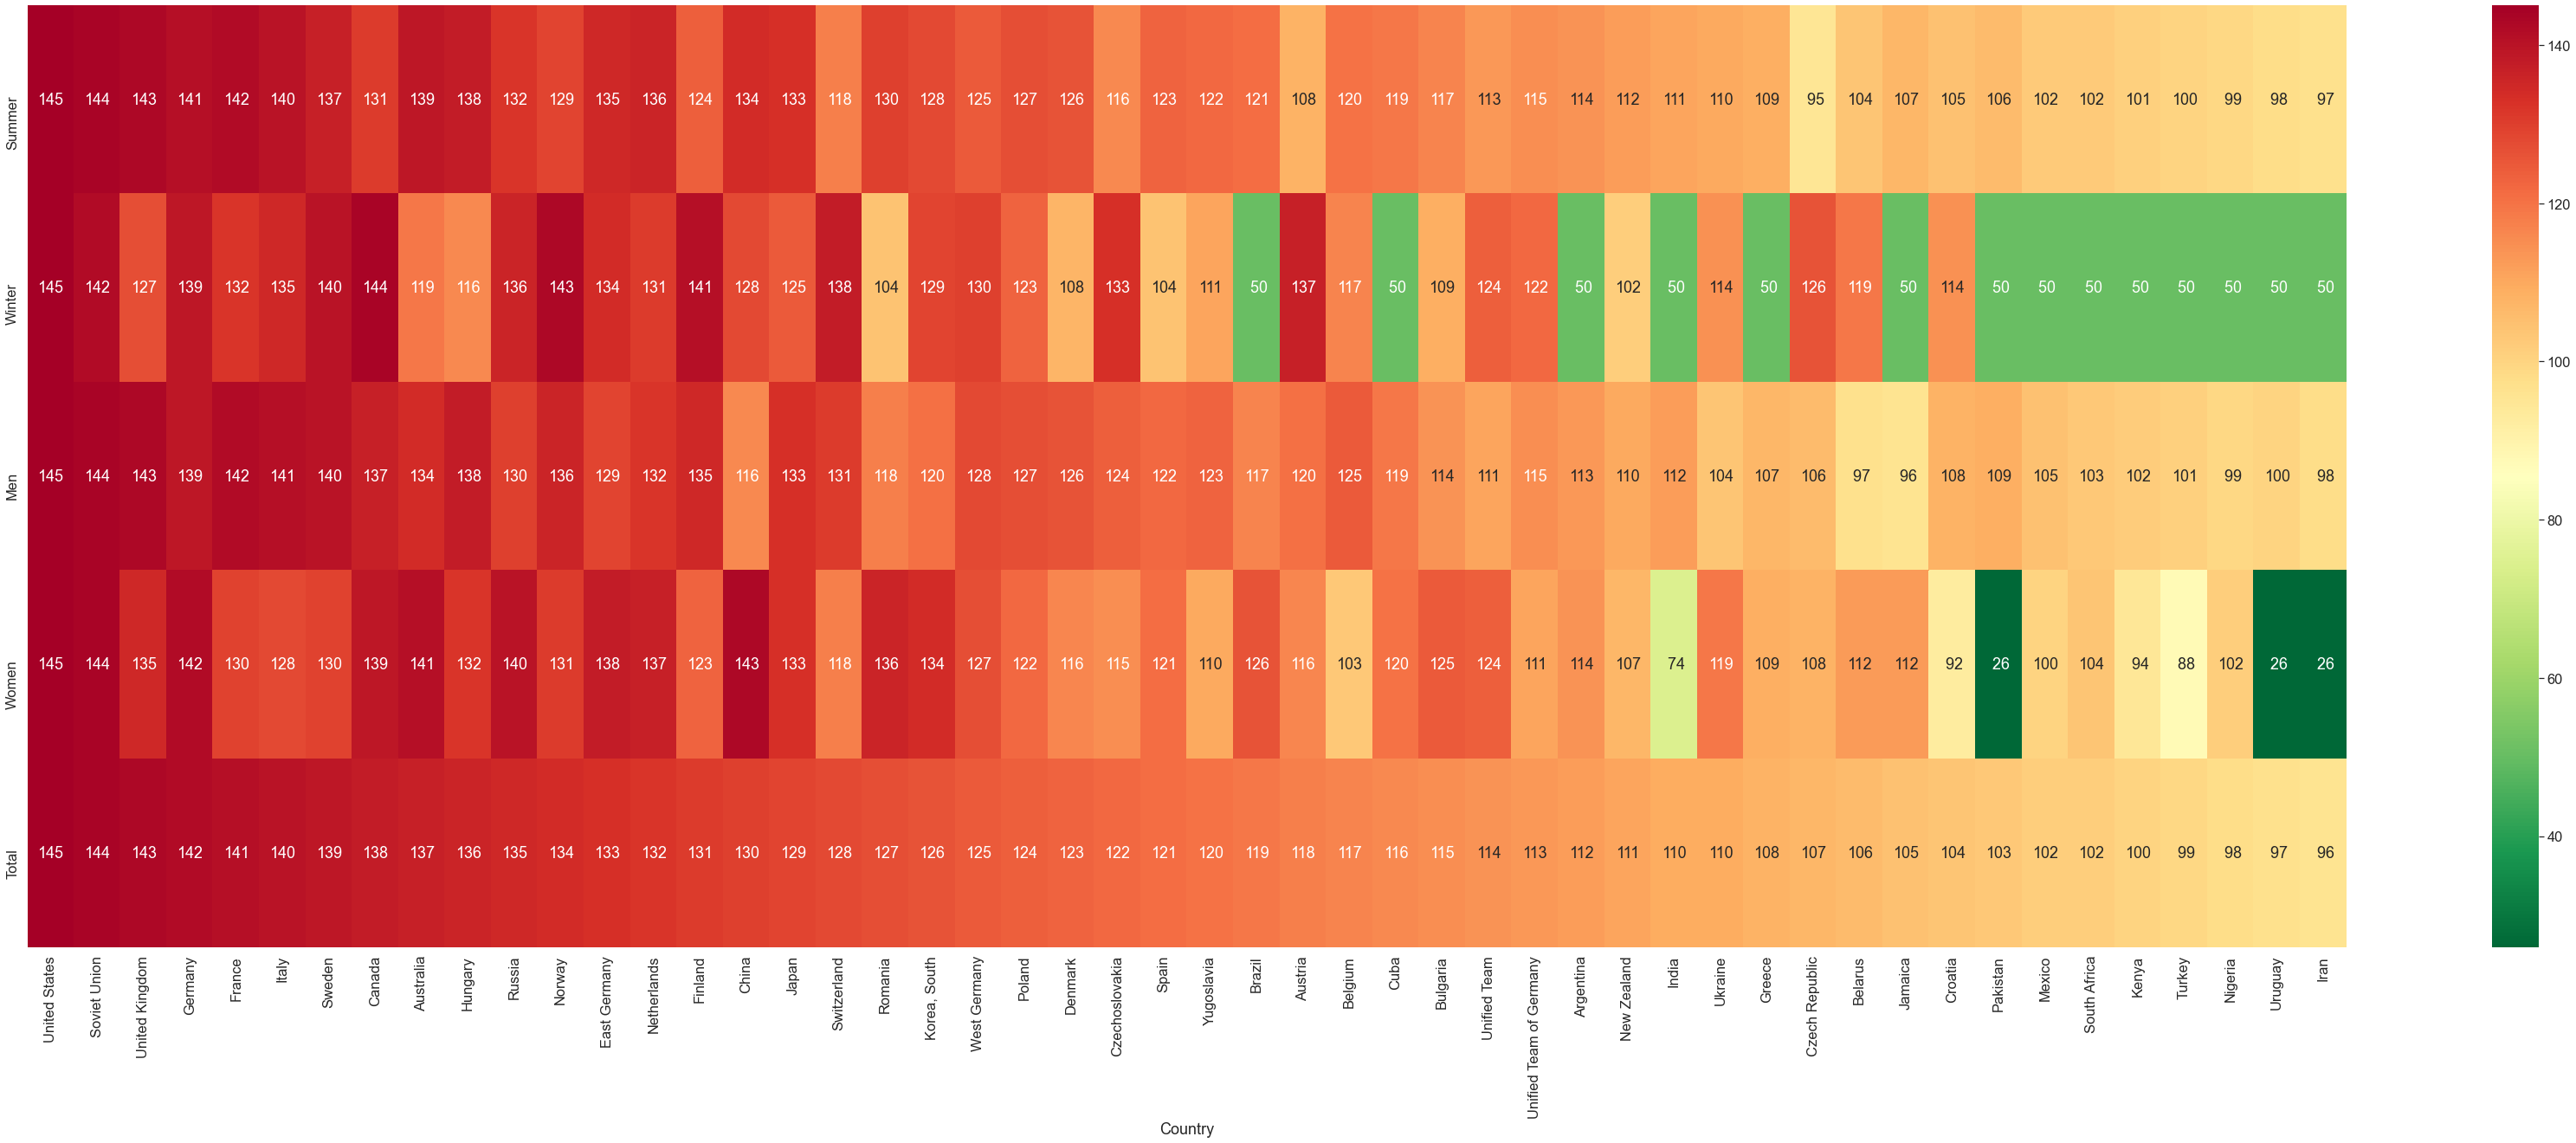

In [231]:
plt.figure(figsize = (60, 20))
sns.heatmap(top_50.T,cmap='RdYlGn_r',annot=True,fmt='3.0f')
plt.show()

In [ ]:
999999999999999999988887333